<a href="https://colab.research.google.com/github/TarrySingh/Tips-Tricks/blob/master/Nick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 0: Vragen

## Het werkstuk valt binnen (en inclusief) de jaren 1850 - 1930, dus de data van 1811 - 1849 en alles na 1930 valt weg:

**Onderzoek:**

1. **Leeftijd** van het eerste huwelijk van de bruidegom en van de bruid door de jaren heen (ik wil kijken of mensen jonger, later of onveranderd trouwen, hertrouwen valt hier buiten) - **Tarry** (JAARAKTE= jaar van trouwen, OPM1= leeftijd bruidegom, OPM2= leeftijd bruid, OPM3, OPM4 en OPM5 zijn notities. Echtscheidingen vaak afgekort tot es. weduwe en weduwenaar vaak afgekort tot Wd. en Wn.)


2. Leeftijd bruidegom en bruid in verhouding tot beroep bruidegom en beroep vader van bruid (trouwen mensen met een minder verdienstelijk beroep, zoals arbeiders jonger of later?) **Nick** (OPM1= leeftijd bruidegom en BEROEBG= beroep bruidegom, OPM2= leeftijd bruid en BERVABD= beroep vader van bruid)

3. Leeftijdsverschil door de jaren heen (hoe vaak komt het voor dat er een leeftijdsverschil van meer dan 5 én meer dan 10 jaar is, en in welk jaartal?) **Tarry** (OPM1= leeftijd bruidegom, OPM2= leeftijd bruid)

4. Voorkomen van echtscheidingen en hertrouwen door de jaren heen **Nick** (OPM3, OPM4 en OPM5 zijn notities. Echtscheidingen vaak afgekort tot es. weduwe en weduwenaar vaak afgekort tot Wd. en Wn.)

5. Type beroep door de jaren heen (Het beroep van de bruidegom, de vader van de bruidengom en de vader van de bruid. Deze wil ik categoriseren, dus X aantal 'armere beroepen' (landarbeiders, dagloners, etc.', en X aantal diversere en 'betere' beroepen (schoenmakers, schippers, winkeliers, bakkers, etc.) Hieruit wil ik kunnen zien welke shift van type beroep plaatsvindt **Tarry** (BEROEBG= beroep bruidegom, BERVABG= beroep vader bruidegom, BERVABD= beroep vader bruid)

6. (Dit kan wellicht later pas) Beroep bruidegom in verhouding tot het beroep van de vader van de bruid (Na het kaderen van deze beroepen wil ik kijken hoe vaak het voorkomt dat mensen uit de arbeidersklasse met de middenklasse trouwen) **Tarry** (BEROEBG= beroep bruidegom, BERVABD= beroep vader bruid)

7. Bruidegommen met een ander beroep dan hun vaders (dus het aantal gevallen door de jaren heen dat een zoon een ander beroep beoefent in verhouding tot hun vader) **Tarry** (BEROEBG= beroep bruidegom, BERVABG= beroep vader bruidegom)

8. Aantal bruiden met een beroep bij aanvang van het trouwen (dus werkende ,  net getrouwde vrouwen) **Nick** (BEROEBD= beroep bruid)

9. Aantal moeders van de bruid en bruidengom met een beroep (dus werkende getrouwde vrouwen) **Tarry** (BERMOBG= beroep moeder bruidegom, BERMOBD= beroep moeder bruid)

10. Type beroep van mannen met een werkende vrouw (ik wil kijken of er een reden is dat de vrouw werkt) (BERVABG= beroep vader bruidegom en BERMOBG= beroep moeder bruidegom/zijn vrouw, BERVABD= beroep vader bruid en BERMOBD= beroep moeder bruid/zijn vrouw)

# **Section 1: Exploratory Data Analysis**

## EDA - Understanding the data. 
- There are a lot of NaN (Not a number or simply empty values)
- Column titles are not a human readable format. Eg: What is "VRNVABG"?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC

In [2]:
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', None)
pd.set_option("max_rows", None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Now, we can use pandas read_excel after installing the excel importer.
df = pd.read_excel('/content/drive/MyDrive/Nick/HUWadorp_1811_1934.xlsx')
df.head(10)

,nummer,aktenummer,DAGAKTE,MAANDAKTE,JAARAKTE,GEMNUM,VOORNBG,TUSVOBG,ACHTRBG,BEROEBG,GBPLABG,DPGEBBG,DAGGBDATG,MAANDGBDATG,JAARGBDATG,VRNVABG,TUSVABG,ACHVABG,BERVABG,VRNMOBG,TUSMOBG,ACHMOBG,BERMOBG,VOORNBD,TUSVOBD,ACHTRBD,BEROEBD,berbdclas,GEBPLBD,DAGGEBDTBD,MAANDGEBDTBD,JAARGEBDTBD,VRNVABD,TUSVABD,ACHVABD,BERVABD,VRNMOBD,TUSMOBD,ACHMOBD,BERMOBD,leefman,leefvrouw,weduwnaar,weduwe,OPM1,OPM2,OPM3,OPM4,OPM5
0,1438.0,1.0,9.0,11.0,1811,Adorp,Jan,NaN,Everts,landbouwer,NaN,D,26.0,8.0,1770.0,Evert,NaN,Jakobs,landbouwer,Willemtje,NaN,Okkes,NaN,Mientje,NaN,Jans,boerinne,landbouwerse,NaN,18.0,4.0,1756.0,Jan,NaN,Derks,NaN,Bouwina,NaN,Hermannus,NaN,40.0,55.0,NaN,weduwe,Bg. 40 jaar,Bd. 55 jaar,Wd. Aries Klasen,NaN,NaN
1,1439.0,2.0,16.0,11.0,1811,Adorp,Reinder Hendriks,de,Vries,boerenknegt,Adorp,D,14.0,8.0,1785.0,Hendrik Reinders,de,Vries,arbeider,Grietje Eltes,NaN,Hartsema,NaN,Peepke,NaN,Heres,boerenmeid,meid,Oostum,28.0,5.0,1787.0,Here,NaN,Klasen,NaN,Reina,NaN,Lippes,NaN,26.0,24.0,NaN,NaN,Bg. 26 jaar,Bd. 24 jaar,curator Bd. Engebartus Grommers,NaN,NaN
2,1440.0,3.0,30.0,11.0,1811,Adorp,Hindrik Egberts,NaN,Kamp,wever,Stedum,D,29.0,4.0,1782.0,Hendrik Egberts,NaN,Kamp,NaN,Peterke,NaN,Tonnis,NaN,Engeltje Klasen,NaN,Doek,boerenmeid,meid,Sauwerd,15.0,10.0,1766.0,Klaas Klasen,NaN,Doek,NaN,Lutske,NaN,Sijgers,NaN,29.0,44.0,NaN,NaN,Bg. 29 jaar,Bd. 44 jaar,NaN,NaN,NaN
3,1441.0,4.0,14.0,12.0,1811,Adorp,Peter Jakobs,de,Vries,landbouwer,Sauwerd,D,21.0,12.0,1777.0,Jakob,NaN,Pieters,landbouwer,Mensje,NaN,Jakobs,NaN,Catharina Maria Jans,NaN,Dijkhuis,NaN,NaN,Zuurdijk,29.0,3.0,1789.0,Jan Thomas,NaN,Dijkhuis,landbouwer,Margaretha Elisabeth,NaN,Tonnis,NaN,34.0,22.0,NaN,NaN,Bg. 34 jaar,Bd. 22 jaar,NaN,NaN,NaN
4,1442.0,1.0,11.0,3.0,1812,Adorp,Berend Jans,NaN,Kuilgen,schoenmaker,NaN,G,NaN,NaN,NaN,Jan Berends,NaN,Kuilgen,landbouwer,Aaltjen,NaN,Berends,daglonersche,Tuina Hindriks,de,Vries,boerenmeid,meid,NaN,NaN,NaN,NaN,Hindrik Jans,de,Vries,timmerman,Helmina,NaN,Hoed,NaN,27.0,19.0,NaN,NaN,Bg. 27 jaar,Bd. 19 jaar,NaN,NaN,NaN
5,1443.0,2.0,8.0,5.0,1812,Adorp,Jakob Raangs,van der,Molen,NaN,NaN,G,NaN,NaN,NaN,Raang Hendriks,van der,Molen,landbouwer,Antje,NaN,Jakobs,landbouwster,Geeske,NaN,Gajes,NaN,NaN,NaN,NaN,NaN,NaN,Gajes,NaN,Drewes,NaN,Martje,NaN,Jans,NaN,NaN,NaN,NaN,NaN,-,Bd. 52 jaar,NaN,NaN,NaN
6,1444.0,3.0,29.0,8.0,1812,Adorp,Nicolaus Copius,NaN,Bolt,schoolmeester,NaN,D,6.0,12.0,1772.0,Copius,NaN,Bolt,NaN,Hilke,NaN,Jans,NaN,Anje,NaN,Drewes,landbouwersche,landbouwerse,NaN,12.0,5.0,1768.0,Drewes,NaN,Klaassen,NaN,Martje,NaN,Willems,NaN,39.0,44.0,NaN,weduwe,Bg. 39 jaar,Bd. 44 jaar,Wd. Pieter Klaassen Teisman,NaN,NaN
7,1445.0,4.0,24.0,10.0,1812,Adorp,Jakob Willems,NaN,Schuiringa,landbouwer,NaN,D,5.0,11.0,1769.0,Willem,NaN,Jans,NaN,Grietje,NaN,Schuiringa,NaN,Willemtje Regniers,NaN,Hoekzema,NaN,NaN,NaN,20.0,3.0,1780.0,Regnier,NaN,Willems,NaN,Geertruid,NaN,Tjaarts,NaN,43.0,32.0,wdnaar,NaN,Bg. 43 jaar,Bd. 32 jaar,Wn. Geertje Rietema,NaN,NaN
8,1446.0,5.0,26.0,12.0,1812,Adorp,Jakob,NaN,Gisolf,NaN,NaN,D,30.0,1.0,1793.0,Wijbe,NaN,Gisolf,NaN,Adriaantje,NaN,Foekens,NaN,Annechje,NaN,Boorsma,NaN,NaN,NaN,27.0,1.0,1788.0,Karel Willemsz,NaN,Boorsma,NaN,Jantje,NaN,Suidema,NaN,20.0,25.0,NaN,NaN,Bg. 20 jaar,Bd. 25 jaar,NaN,NaN,NaN
9,1447.0,1.0,6.0,2.0,1813,Adorp,Abraham Hindriks,van der,Kooij,NaN,NaN,D,11.0,7.0,1784.0,Hindrik Abrahams,van der,Kooij,NaN,Imke,NaN,Klaassen,NaN,Trijntje Simens,NaN,Hoving,NaN,NaN,NaN,21.0,4.0,1793.0,Sijmen Klaassen,NaN,Hoving,NaN,Barbera,NaN,Karssens,NaN,28.0,19.0,NaN,NaN,Bg. 28 jaar,Bd. 19 jaar,NaN,NaN,NaN


In [5]:
print(df.shape)

(1321, 49)


In [6]:
print(df.columns)

Index(['nummer', 'aktenummer', 'DAGAKTE', 'MAANDAKTE', 'JAARAKTE', 'GEMNUM',
       'VOORNBG', 'TUSVOBG', 'ACHTRBG', 'BEROEBG', 'GBPLABG', 'DPGEBBG',
       'DAGGBDATG', 'MAANDGBDATG', 'JAARGBDATG', 'VRNVABG', 'TUSVABG',
       'ACHVABG', 'BERVABG', 'VRNMOBG', 'TUSMOBG', 'ACHMOBG', 'BERMOBG',
       'VOORNBD', 'TUSVOBD', 'ACHTRBD', 'BEROEBD', 'berbdclas', 'GEBPLBD',
       'DAGGEBDTBD', 'MAANDGEBDTBD', 'JAARGEBDTBD', 'VRNVABD', 'TUSVABD',
       'ACHVABD', 'BERVABD', 'VRNMOBD', 'TUSMOBD', 'ACHMOBD', 'BERMOBD',
       'leefman', 'leefvrouw', 'weduwnaar', 'weduwe', 'OPM1', 'OPM2', 'OPM3',
       'OPM4', 'OPM5'],
      dtype='object')


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nummer        1321 non-null   float64
 1   aktenummer    1321 non-null   float64
 2   DAGAKTE       1321 non-null   float64
 3   MAANDAKTE     1321 non-null   float64
 4   JAARAKTE      1321 non-null   int64  
 5   GEMNUM        1321 non-null   object 
 6   VOORNBG       1321 non-null   object 
 7   TUSVOBG       226 non-null    object 
 8   ACHTRBG       1321 non-null   object 
 9   BEROEBG       1176 non-null   object 
 10  GBPLABG       1248 non-null   object 
 11  DPGEBBG       1321 non-null   object 
 12  DAGGBDATG     160 non-null    float64
 13  MAANDGBDATG   160 non-null    float64
 14  JAARGBDATG    160 non-null    float64
 15  VRNVABG       1313 non-null   object 
 16  TUSVABG       204 non-null    object 
 17  ACHVABG       1321 non-null   object 
 18  BERVABG       713 non-null  

In [ ]:
df.describe()

,nummer,aktenummer,DAGAKTE,MAANDAKTE,JAARAKTE,DAGGBDATG,MAANDGBDATG,JAARGBDATG,DAGGEBDTBD,MAANDGEBDTBD,JAARGEBDTBD,leefman,leefvrouw
count,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,160.000000,160.000000,160.000000,159.000000,159.000000,159.000000,1320.000000,1320.000000
mean,9586.116578,6.582892,16.158970,5.890235,1875.606359,16.581250,6.750000,1796.337500,16.213836,6.389937,1799.591195,30.140909,26.778788
std,27424.476292,4.317966,8.569794,2.769296,33.876953,9.025103,3.487624,10.709361,8.955138,3.721154,10.421019,8.412408,7.238355
min,36.000000,1.000000,1.000000,1.000000,1811.000000,1.000000,1.000000,1766.000000,1.000000,1.000000,1756.000000,18.000000,16.000000
25%,366.000000,3.000000,9.000000,4.000000,1850.000000,9.000000,4.000000,1791.750000,8.000000,3.000000,1795.000000,25.000000,22.000000
50%,696.000000,6.000000,17.000000,5.000000,1875.000000,17.000000,7.000000,1798.000000,17.000000,6.000000,1801.000000,28.000000,25.000000
75%,1026.000000,9.000000,23.000000,7.000000,1904.000000,25.000000,10.000000,1803.000000,24.000000,10.000000,1806.000000,33.000000,29.000000
max,93700.000000,28.000000,31.000000,12.000000,1934.000000,31.000000,12.000000,1817.000000,31.000000,17.000000,1818.000000,77.000000,63.000000


In [ ]:
df.describe(include=["object", "bool"])

,GEMNUM,VOORNBG,TUSVOBG,ACHTRBG,BEROEBG,GBPLABG,DPGEBBG,VRNVABG,TUSVABG,ACHVABG,BERVABG,VRNMOBG,TUSMOBG,ACHMOBG,BERMOBG,VOORNBD,TUSVOBD,ACHTRBD,BEROEBD,berbdclas,GEBPLBD,VRNVABD,TUSVABD,ACHVABD,BERVABD,VRNMOBD,TUSMOBD,ACHMOBD,BERMOBD,weduwnaar,weduwe,OPM1,OPM2,OPM3,OPM4,OPM5
count,1321,1321,226,1321,1176,1248,1321,1313,204,1321,713,1321,192,1321,269,1321,207,1321,549,549,1247,1310,198,1321,809,1321,173,1320,299,187,135,1321,1321,342,125,22
unique,1,619,5,560,189,265,2,672,5,587,110,696,7,641,43,641,6,504,32,4,219,585,6,508,87,610,7,539,35,2,2,81,71,300,123,21
top,Adorp,Jan,van,Dijk,landbouwer,Adorp,G,Jan,van,Vries,landbouwer,Jantje,van,Jans,dagloonster,Jantje,van,Medema,dienstmeid,meid,Adorp,Jan,van,Medema,landbouwer,Jantje,van,Jans,landbouwster,wdnaar,weduwe,Bg. 25 jaar,Bd. 23 jaar,Gd.,Wd. Marten Hamming,Tv. Bd. Jan Gerrits Geersema
freq,1321,107,80,23,199,146,1245,57,72,18,191,41,68,38,72,68,79,25,327,417,264,98,77,25,237,48,64,40,84,184,133,104,106,15,2,2


# Vraag 1
### Leeftijd van de bruidegom en van de bruid door de jaren heen

Leeftijd van het eerste huwelijk van de bruidegom en van de bruid door de jaren heen (ik wil kijken of mensen jonger, later of onveranderd trouwen, hertrouwen valt hier buiten) - Tarry (JAARAKTE= jaar van trouwen, OPM1= leeftijd bruidegom, OPM2= leeftijd bruid, OPM3, OPM4 en OPM5 zijn notities. Echtscheidingen vaak afgekort tot es. weduwe en weduwenaar vaak afgekort tot Wd. en Wn.)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC

In [ ]:
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', None)
pd.set_option("max_rows", None)

In [ ]:
# Leeftijd van de bruidegom en van de bruid door de jaren heen (ik wil kijken of mensen jonger, later of onveranderd trouwen)
# Groom's and Bride's Age Over the Years (I want to see if people are getting married younger, later, or unchanged)
# var = pd.read_excel(('/content/drive/MyDrive/Nick/HUWadorp_1811_1934.xlsx'))
df = pd.read_excel('/content/drive/MyDrive/Nick/HUWadorp_1811_1934.xlsx')
df = df[['JAARAKTE', 'OPM1', 'OPM2']] 
df.head(10)

,JAARAKTE,OPM1,OPM2
0,1811,Bg. 40 jaar,Bd. 55 jaar
1,1811,Bg. 26 jaar,Bd. 24 jaar
2,1811,Bg. 29 jaar,Bd. 44 jaar
3,1811,Bg. 34 jaar,Bd. 22 jaar
4,1812,Bg. 27 jaar,Bd. 19 jaar
5,1812,-,Bd. 52 jaar
6,1812,Bg. 39 jaar,Bd. 44 jaar
7,1812,Bg. 43 jaar,Bd. 32 jaar
8,1812,Bg. 20 jaar,Bd. 25 jaar
9,1813,Bg. 28 jaar,Bd. 19 jaar


In [ ]:
df1 = df.OPM1.str.extract('(\d+)')
df1

,0
0,40
1,26
2,29
3,34
4,27
5,NaN
6,39
7,43
8,20
9,28


In [ ]:
file_name = 'Man.xlsx'

In [ ]:
df1.to_excel("Man.xlsx")
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [ ]:
df2 = df.OPM2.str.extract('(\d+)')
df2.tail(3)

,0
1318,24
1319,26
1320,26


In [ ]:
file_name = 'Vrouw.xlsx'
df2.to_excel("Vrouw.xlsx")
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [ ]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1320 non-null   object
dtypes: object(1)
memory usage: 10.4+ KB
None


In [ ]:
df1.rename( columns={0 :'Bruidgom Leeftijd'}, inplace=True )
df2.rename( columns={0 :'Bruid Leeftijd'}, inplace=True )

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Bruidgom Leeftijd  1320 non-null   object
dtypes: object(1)
memory usage: 10.4+ KB


In [ ]:
df = df.astype({"Bruidgom Leeftijd": int})

KeyError: ignored

In [ ]:
df1["Bruidgom Leeftijd"] = df["Bruidgom Leeftijd"].astype(str).astype(int)

In [ ]:
df_new = df.append(df1)
df_new.tail(3)

,JAARAKTE,OPM1,OPM2,0
1318,NaN,NaN,NaN,24
1319,NaN,NaN,NaN,25
1320,NaN,NaN,NaN,41


In [ ]:
df_new = df_new.append(df2)
df_new.tail(10)

,0,JAARAKTE,OPM1,OPM2
1311,25,NaN,NaN,NaN
1312,22,NaN,NaN,NaN
1313,25,NaN,NaN,NaN
1314,21,NaN,NaN,NaN
1315,25,NaN,NaN,NaN
1316,21,NaN,NaN,NaN
1317,24,NaN,NaN,NaN
1318,24,NaN,NaN,NaN
1319,26,NaN,NaN,NaN
1320,26,NaN,NaN,NaN


In [ ]:
df.tail(5)

,JAARAKTE,OPM1,OPM2
1316,1934,bruidegom 23 jaar,bruid 21 jaar
1317,1934,bruidegom 26 jaar,bruid 24 jaar
1318,1934,bruidegom 24 jaar,bruid 24 jaar
1319,1934,bruidegom 25 jaar,bruid 26 jaar
1320,1934,bruidegom 41 jaar,bruid 26 jaar


In [ ]:
# # trend line
# df.plot(x="JAARAKTE", y=["OPM1", "OPM2"], kind="bar")
df = ["JAARAKTE", df1, df2]


In [ ]:
df

['JAARAKTE',         0
 0      40
 1      26
 2      29
 3      34
 4      27
 5     NaN
 6      39
 7      43
 8      20
 9      28
 10     27
 11     30
 12     18
 13     27
 14     36
 15     26
 16     21
 17     31
 18     21
 19     24
 20     21
 21     33
 22     35
 23     30
 24     39
 25     25
 26     25
 27     32
 28     36
 29     35
 30     22
 31     32
 32     41
 33     23
 34     43
 35     33
 36     26
 37     32
 38     31
 39     24
 40     26
 41     69
 42     42
 43     32
 44     38
 45     22
 46     42
 47     18
 48     31
 49     56
 50     22
 51     39
 52     21
 53     22
 54     46
 55     34
 56     56
 57     22
 58     28
 59     28
 60     33
 61     22
 62     24
 63     42
 64     28
 65     23
 66     61
 67     29
 68     21
 69     31
 70     19
 71     56
 72     45
 73     61
 74     29
 75     22
 76     29
 77     34
 78     27
 79     21
 80     44
 81     26
 82     24
 83     34
 84     27
 85     26
 86     27
 87     24
 88     2

# Vraag 2

Leeftijd bruidegom en bruid in verhouding tot beroep bruidegom en beroep vader van bruid (trouwen mensen met een minder verdienstelijk beroep, zoals arbeiders jonger of later?) Nick (OPM1= leeftijd bruidegom en BEROEBG= beroep bruidegom, OPM2= leeftijd bruid en BERVABD= beroep vader van bruid)

#Vraag 5

Type beroep door de jaren heen (Het beroep van de bruidegom, de vader van de bruidengom en de vader van de bruid. Deze wil ik categoriseren, dus X aantal 'armere beroepen' (landarbeiders, dagloners, etc.', en X aantal diversere en 'betere' beroepen (schoenmakers, schippers, winkeliers, bakkers, etc.) Hieruit wil ik kunnen zien welke shift van type beroep plaatsvindt Tarry (BEROEBG= beroep bruidegom, BERVABG= beroep vader bruidegom, BERVABD= beroep vader bruid)

In [8]:
df.isna().sum()

nummer             0
aktenummer         0
DAGAKTE            0
MAANDAKTE          0
JAARAKTE           0
GEMNUM             0
VOORNBG            0
TUSVOBG         1095
ACHTRBG            0
BEROEBG          145
GBPLABG           73
DPGEBBG            0
DAGGBDATG       1161
MAANDGBDATG     1161
JAARGBDATG      1161
VRNVABG            8
TUSVABG         1117
ACHVABG            0
BERVABG          608
VRNMOBG            0
TUSMOBG         1129
ACHMOBG            0
BERMOBG         1052
VOORNBD            0
TUSVOBD         1114
ACHTRBD            0
BEROEBD          772
berbdclas        772
GEBPLBD           74
DAGGEBDTBD      1162
MAANDGEBDTBD    1162
JAARGEBDTBD     1162
VRNVABD           11
TUSVABD         1123
ACHVABD            0
BERVABD          512
VRNMOBD            0
TUSMOBD         1148
ACHMOBD            1
BERMOBD         1022
leefman            1
leefvrouw          1
weduwnaar       1134
weduwe          1186
OPM1               0
OPM2               0
OPM3             979
OPM4         

In [9]:
df1 = df[['JAARAKTE', 'BEROEBG', 'BERVABG', 'BERVABD']]

In [10]:
df1.head(10)

,JAARAKTE,BEROEBG,BERVABG,BERVABD
0,1811,landbouwer,landbouwer,NaN
1,1811,boerenknegt,arbeider,NaN
2,1811,wever,NaN,NaN
3,1811,landbouwer,landbouwer,landbouwer
4,1812,schoenmaker,landbouwer,timmerman
5,1812,NaN,landbouwer,NaN
6,1812,schoolmeester,NaN,NaN
7,1812,landbouwer,NaN,NaN
8,1812,NaN,NaN,NaN
9,1813,NaN,NaN,NaN


In [11]:
len(df1.index)

1321

In [12]:
df1.fillna('Niet Bekend', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [13]:
len(df1.index)

1321

In [14]:
df1['BEROEBG'] = df1['BEROEBG'].astype('unicode')
df1['BERVABG'] = df1['BERVABG'].astype('unicode')
df1['BERVABD'] = df1['BERVABD'].astype('unicode')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [15]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   JAARAKTE  1321 non-null   int64 
 1   BEROEBG   1321 non-null   object
 2   BERVABG   1321 non-null   object
 3   BERVABD   1321 non-null   object
dtypes: int64(1), object(3)
memory usage: 41.4+ KB
None


In [16]:
df1.head(10)

,JAARAKTE,BEROEBG,BERVABG,BERVABD
0,1811,landbouwer,landbouwer,Niet Bekend
1,1811,boerenknegt,arbeider,Niet Bekend
2,1811,wever,Niet Bekend,Niet Bekend
3,1811,landbouwer,landbouwer,landbouwer
4,1812,schoenmaker,landbouwer,timmerman
5,1812,Niet Bekend,landbouwer,Niet Bekend
6,1812,schoolmeester,Niet Bekend,Niet Bekend
7,1812,landbouwer,Niet Bekend,Niet Bekend
8,1812,Niet Bekend,Niet Bekend,Niet Bekend
9,1813,Niet Bekend,Niet Bekend,Niet Bekend


In [17]:
# Set the figure size - handy for larger output
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [30, 18]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'
import seaborn

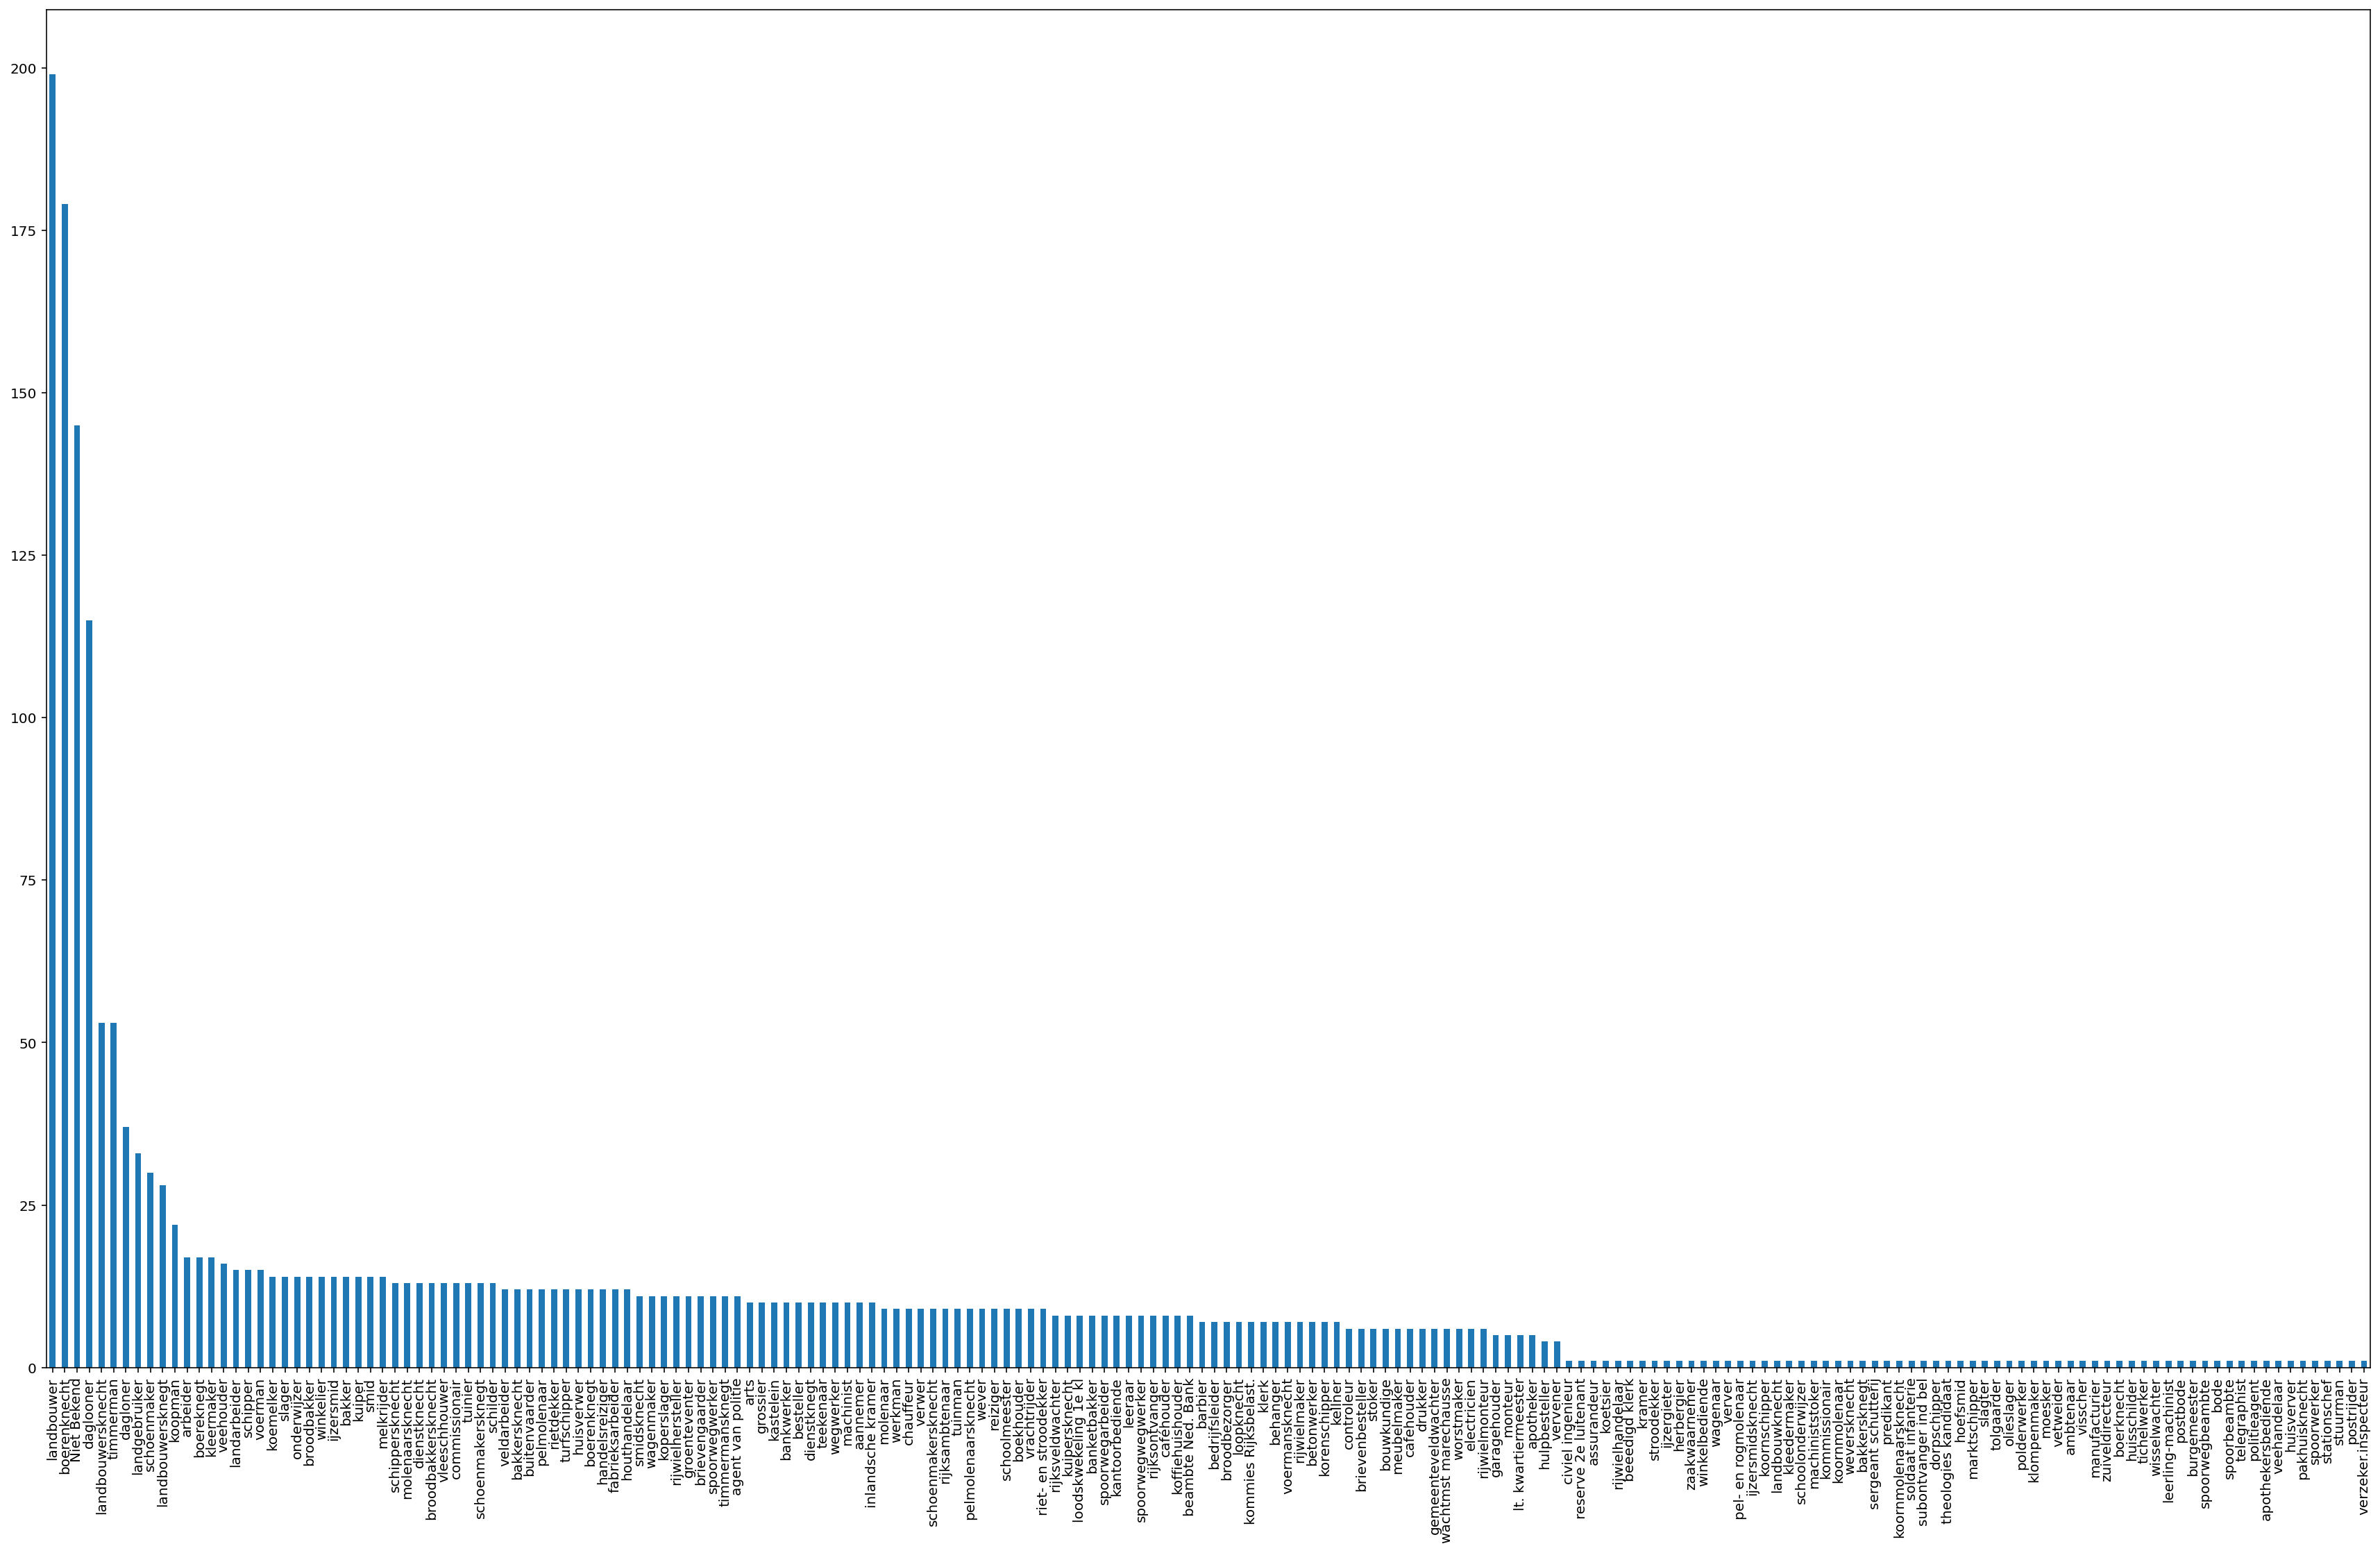

In [18]:
df1['JAARAKTE'].value_counts().plot.bar()
df1['BEROEBG'].value_counts().plot.bar()

df1['JAARAKTE'].value_counts().plot.bar()
df1['BEROEBG'].value_counts().plot.bar()


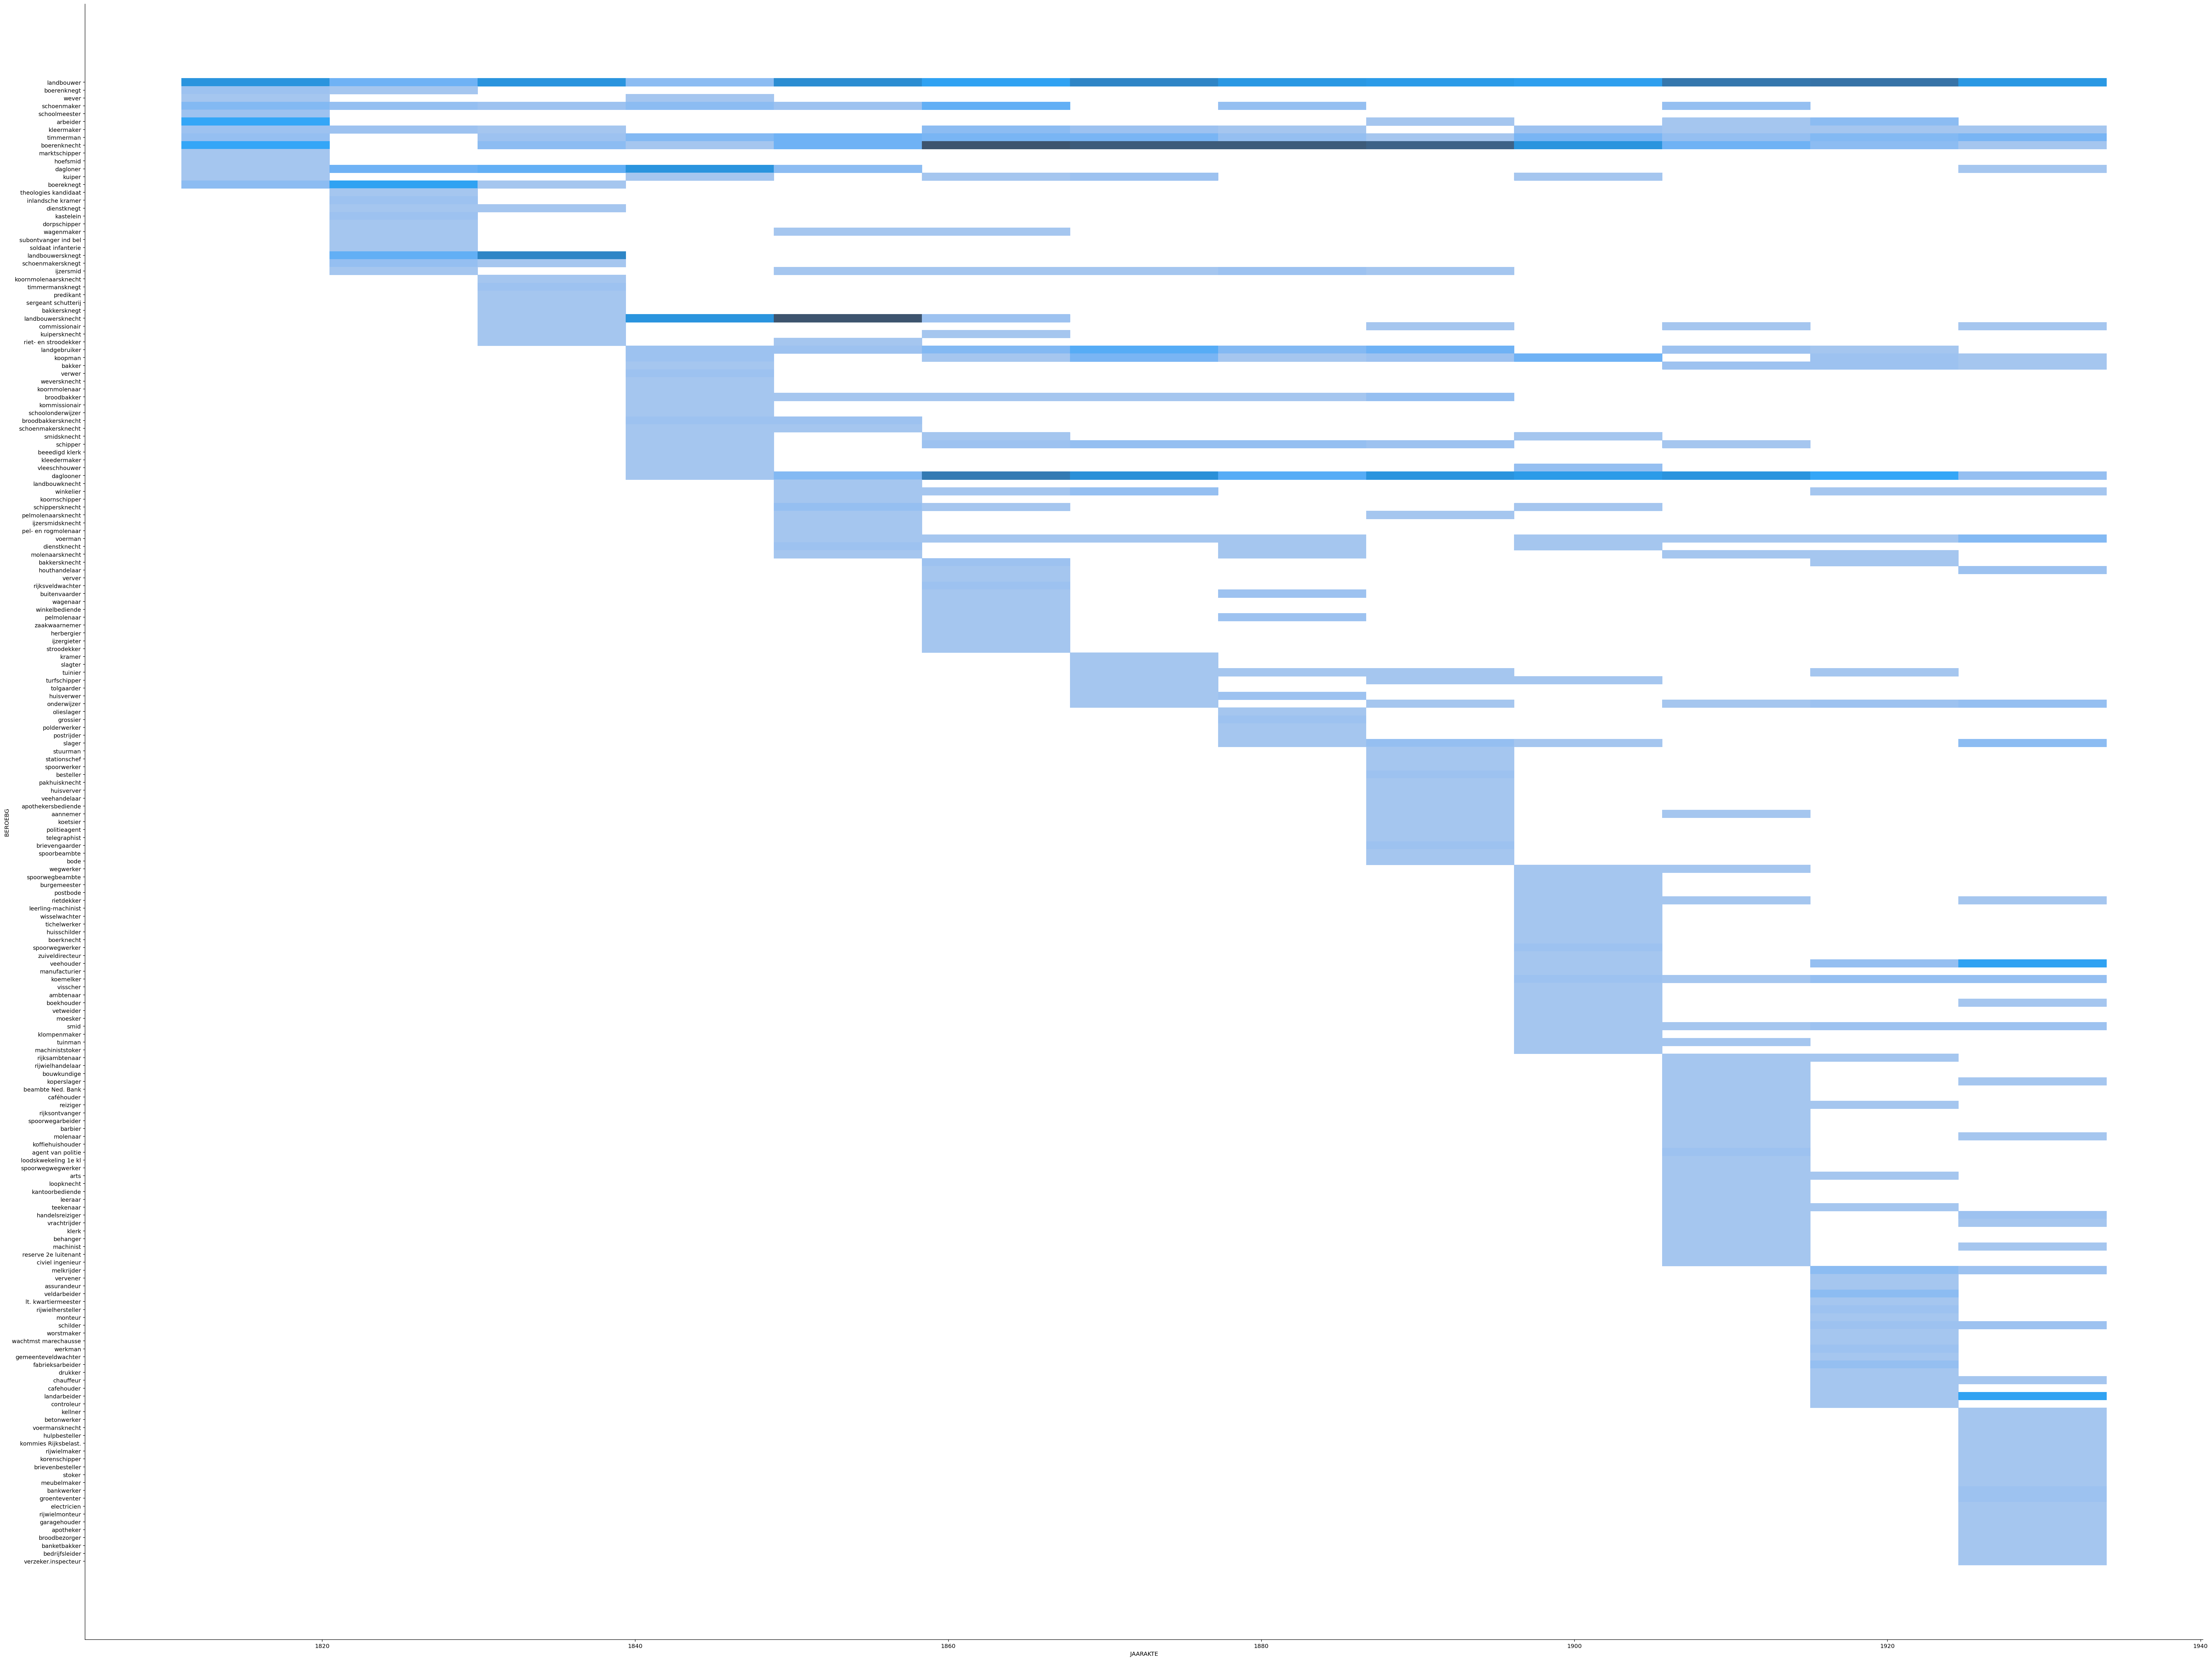

In [19]:

sns.displot(df,x='JAARAKTE', y='BEROEBG', height=40, aspect=1.33)

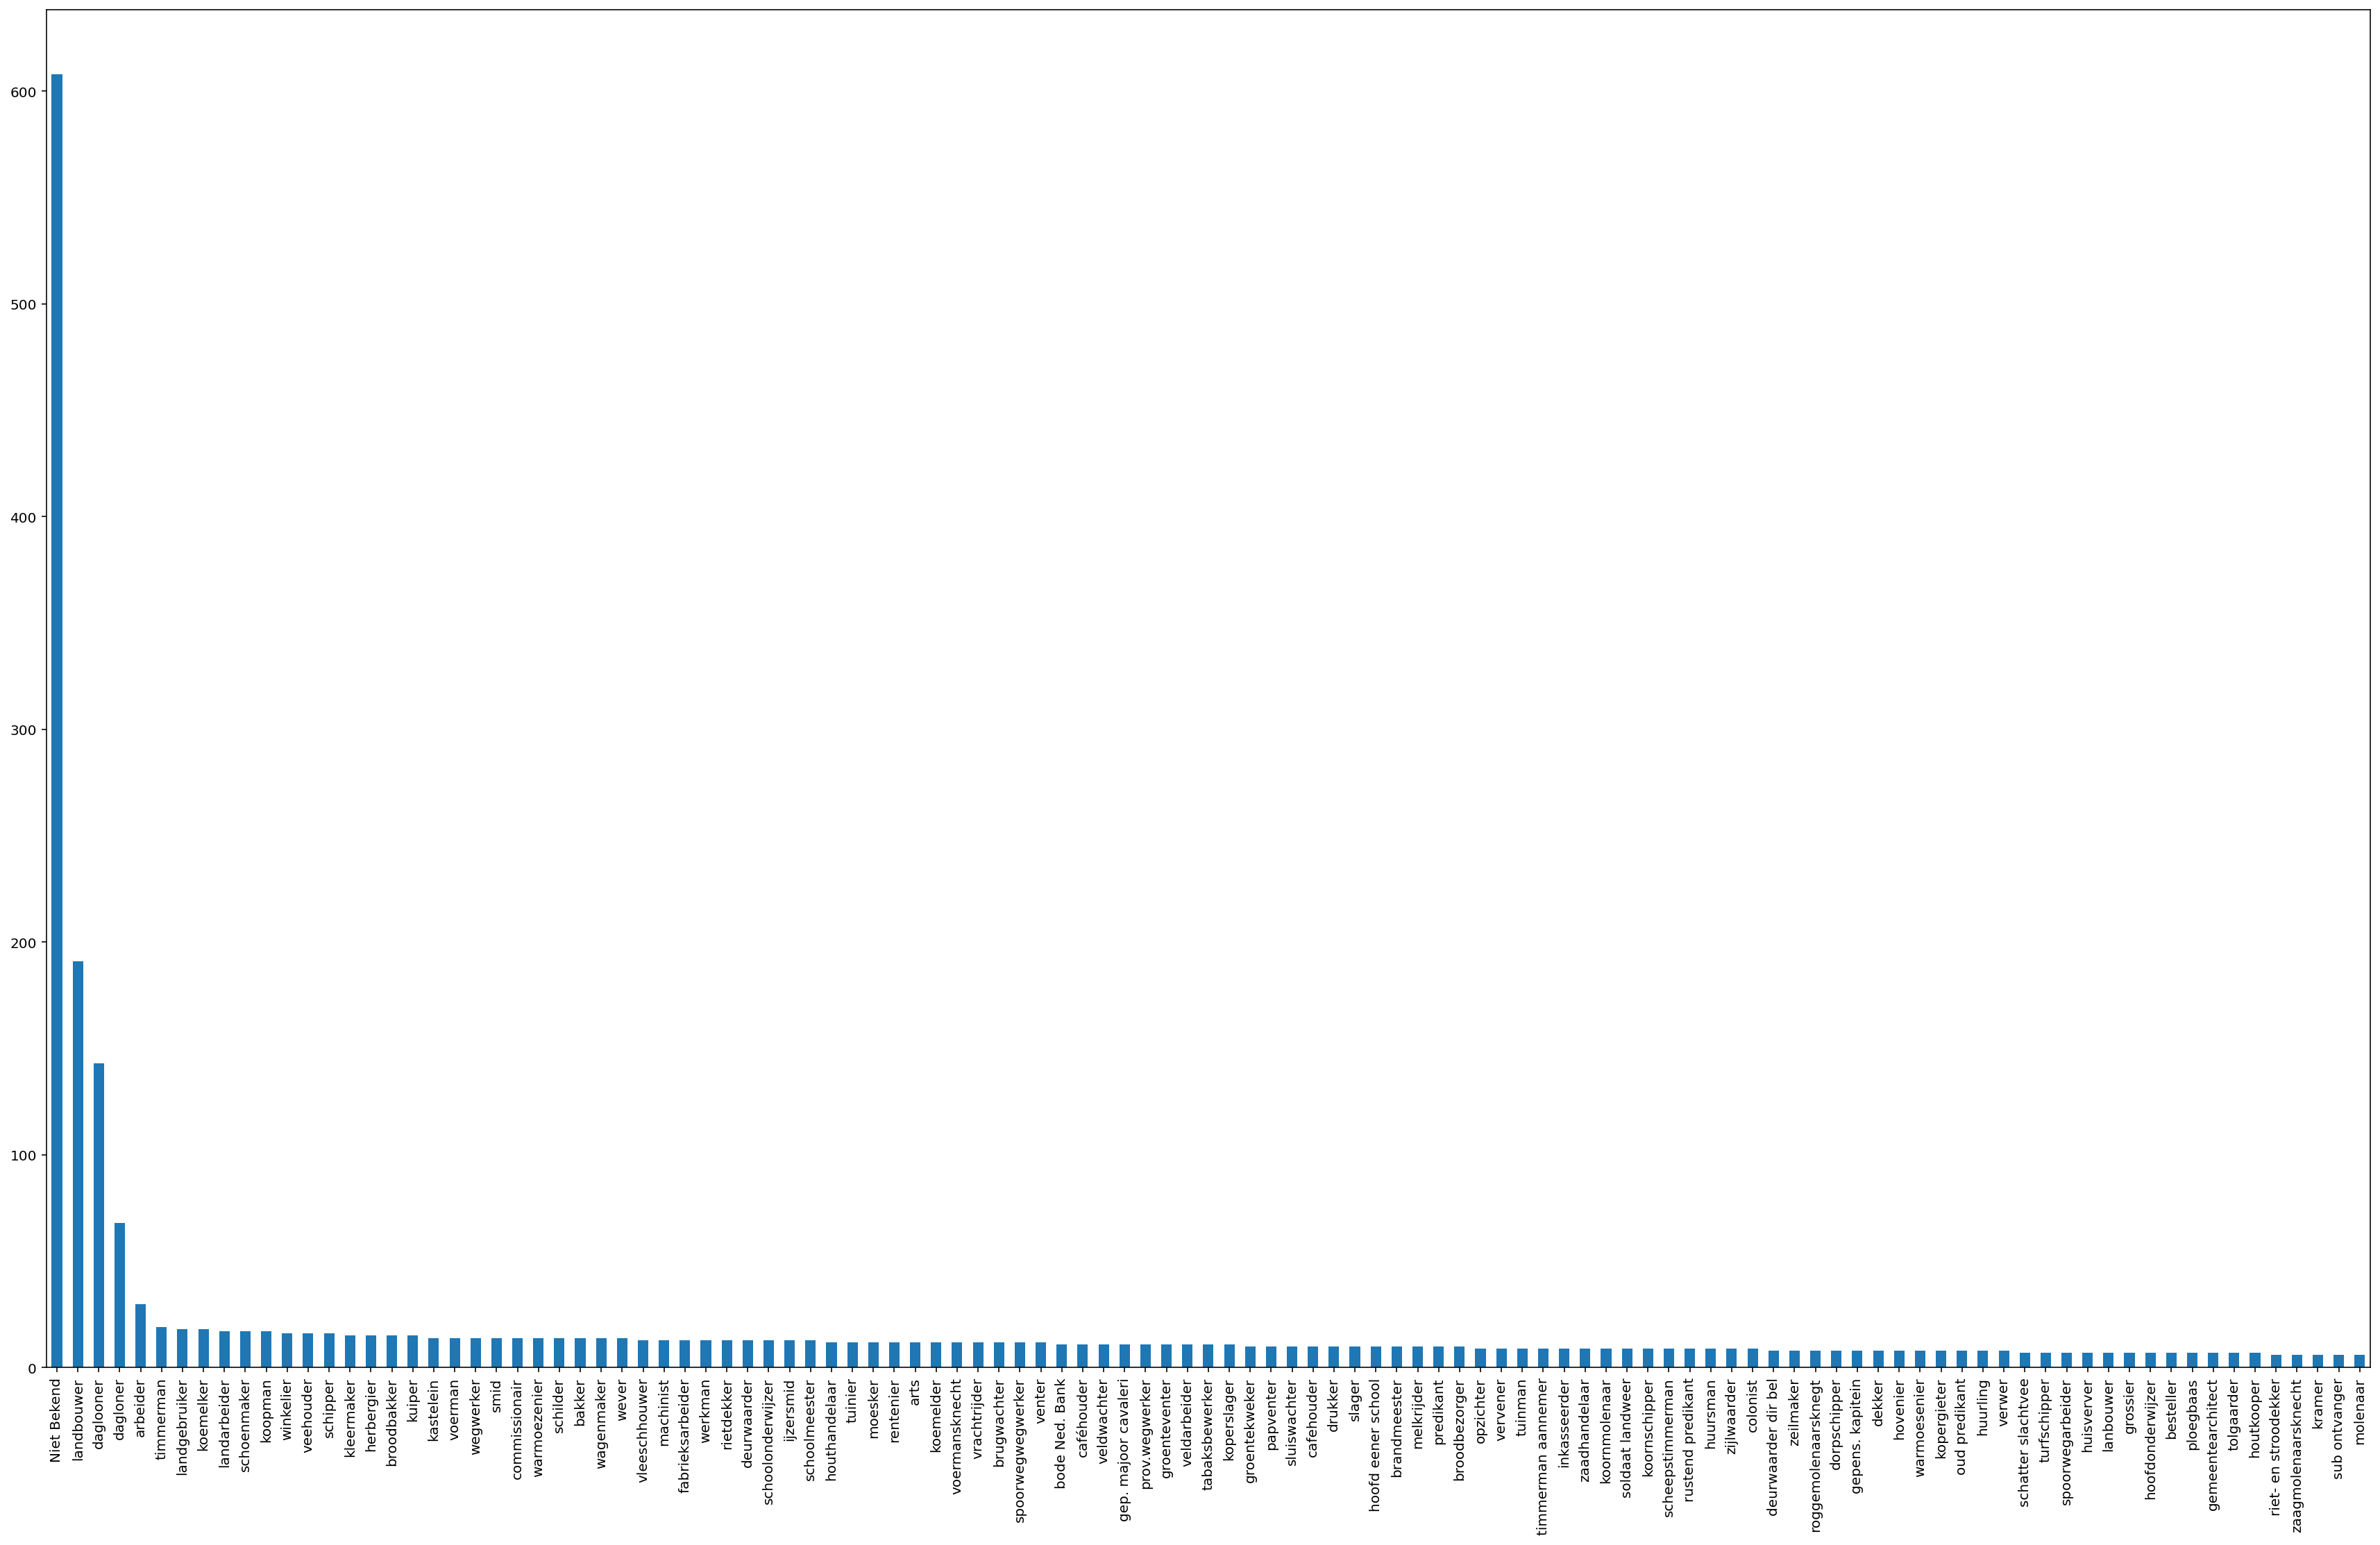

In [20]:
df1['JAARAKTE'].value_counts().plot.bar()
df1['BERVABG'].value_counts().plot.bar()

df1['JAARAKTE'].value_counts().plot.bar()
df1['BERVABG'].value_counts().plot.bar()


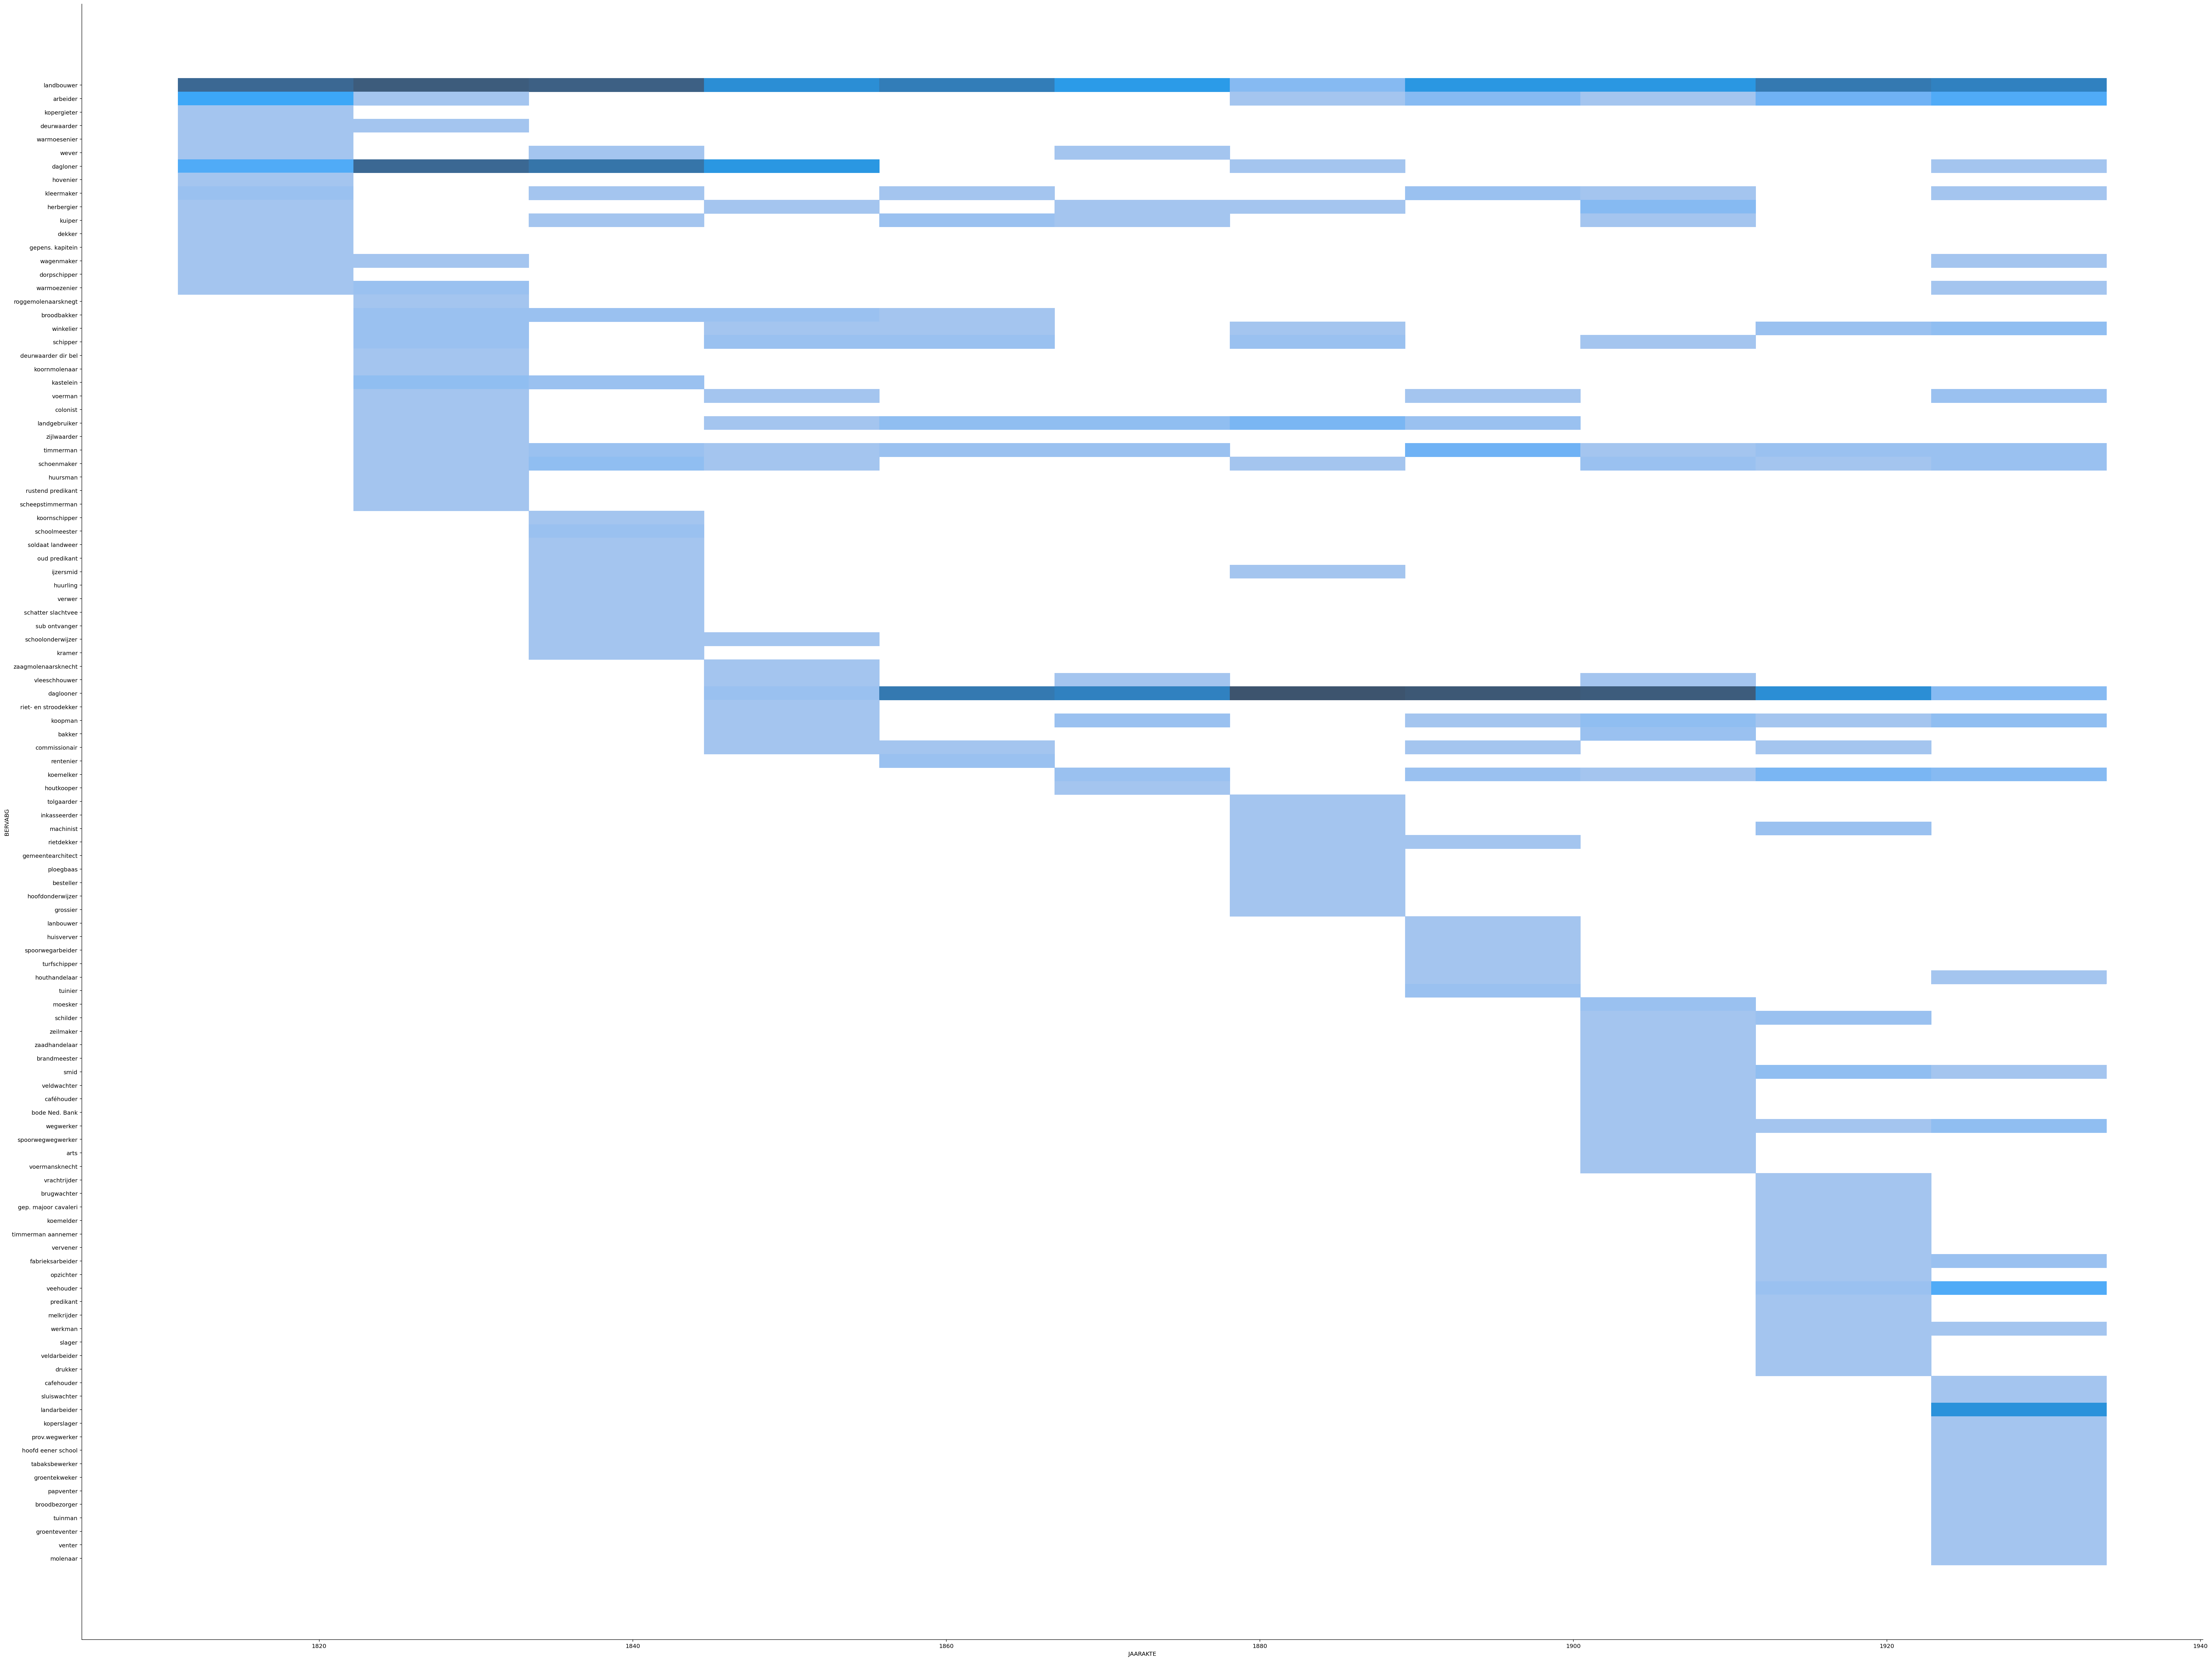

In [21]:
sns.displot(df,x='JAARAKTE', y='BERVABG', height=40, aspect=1.33)

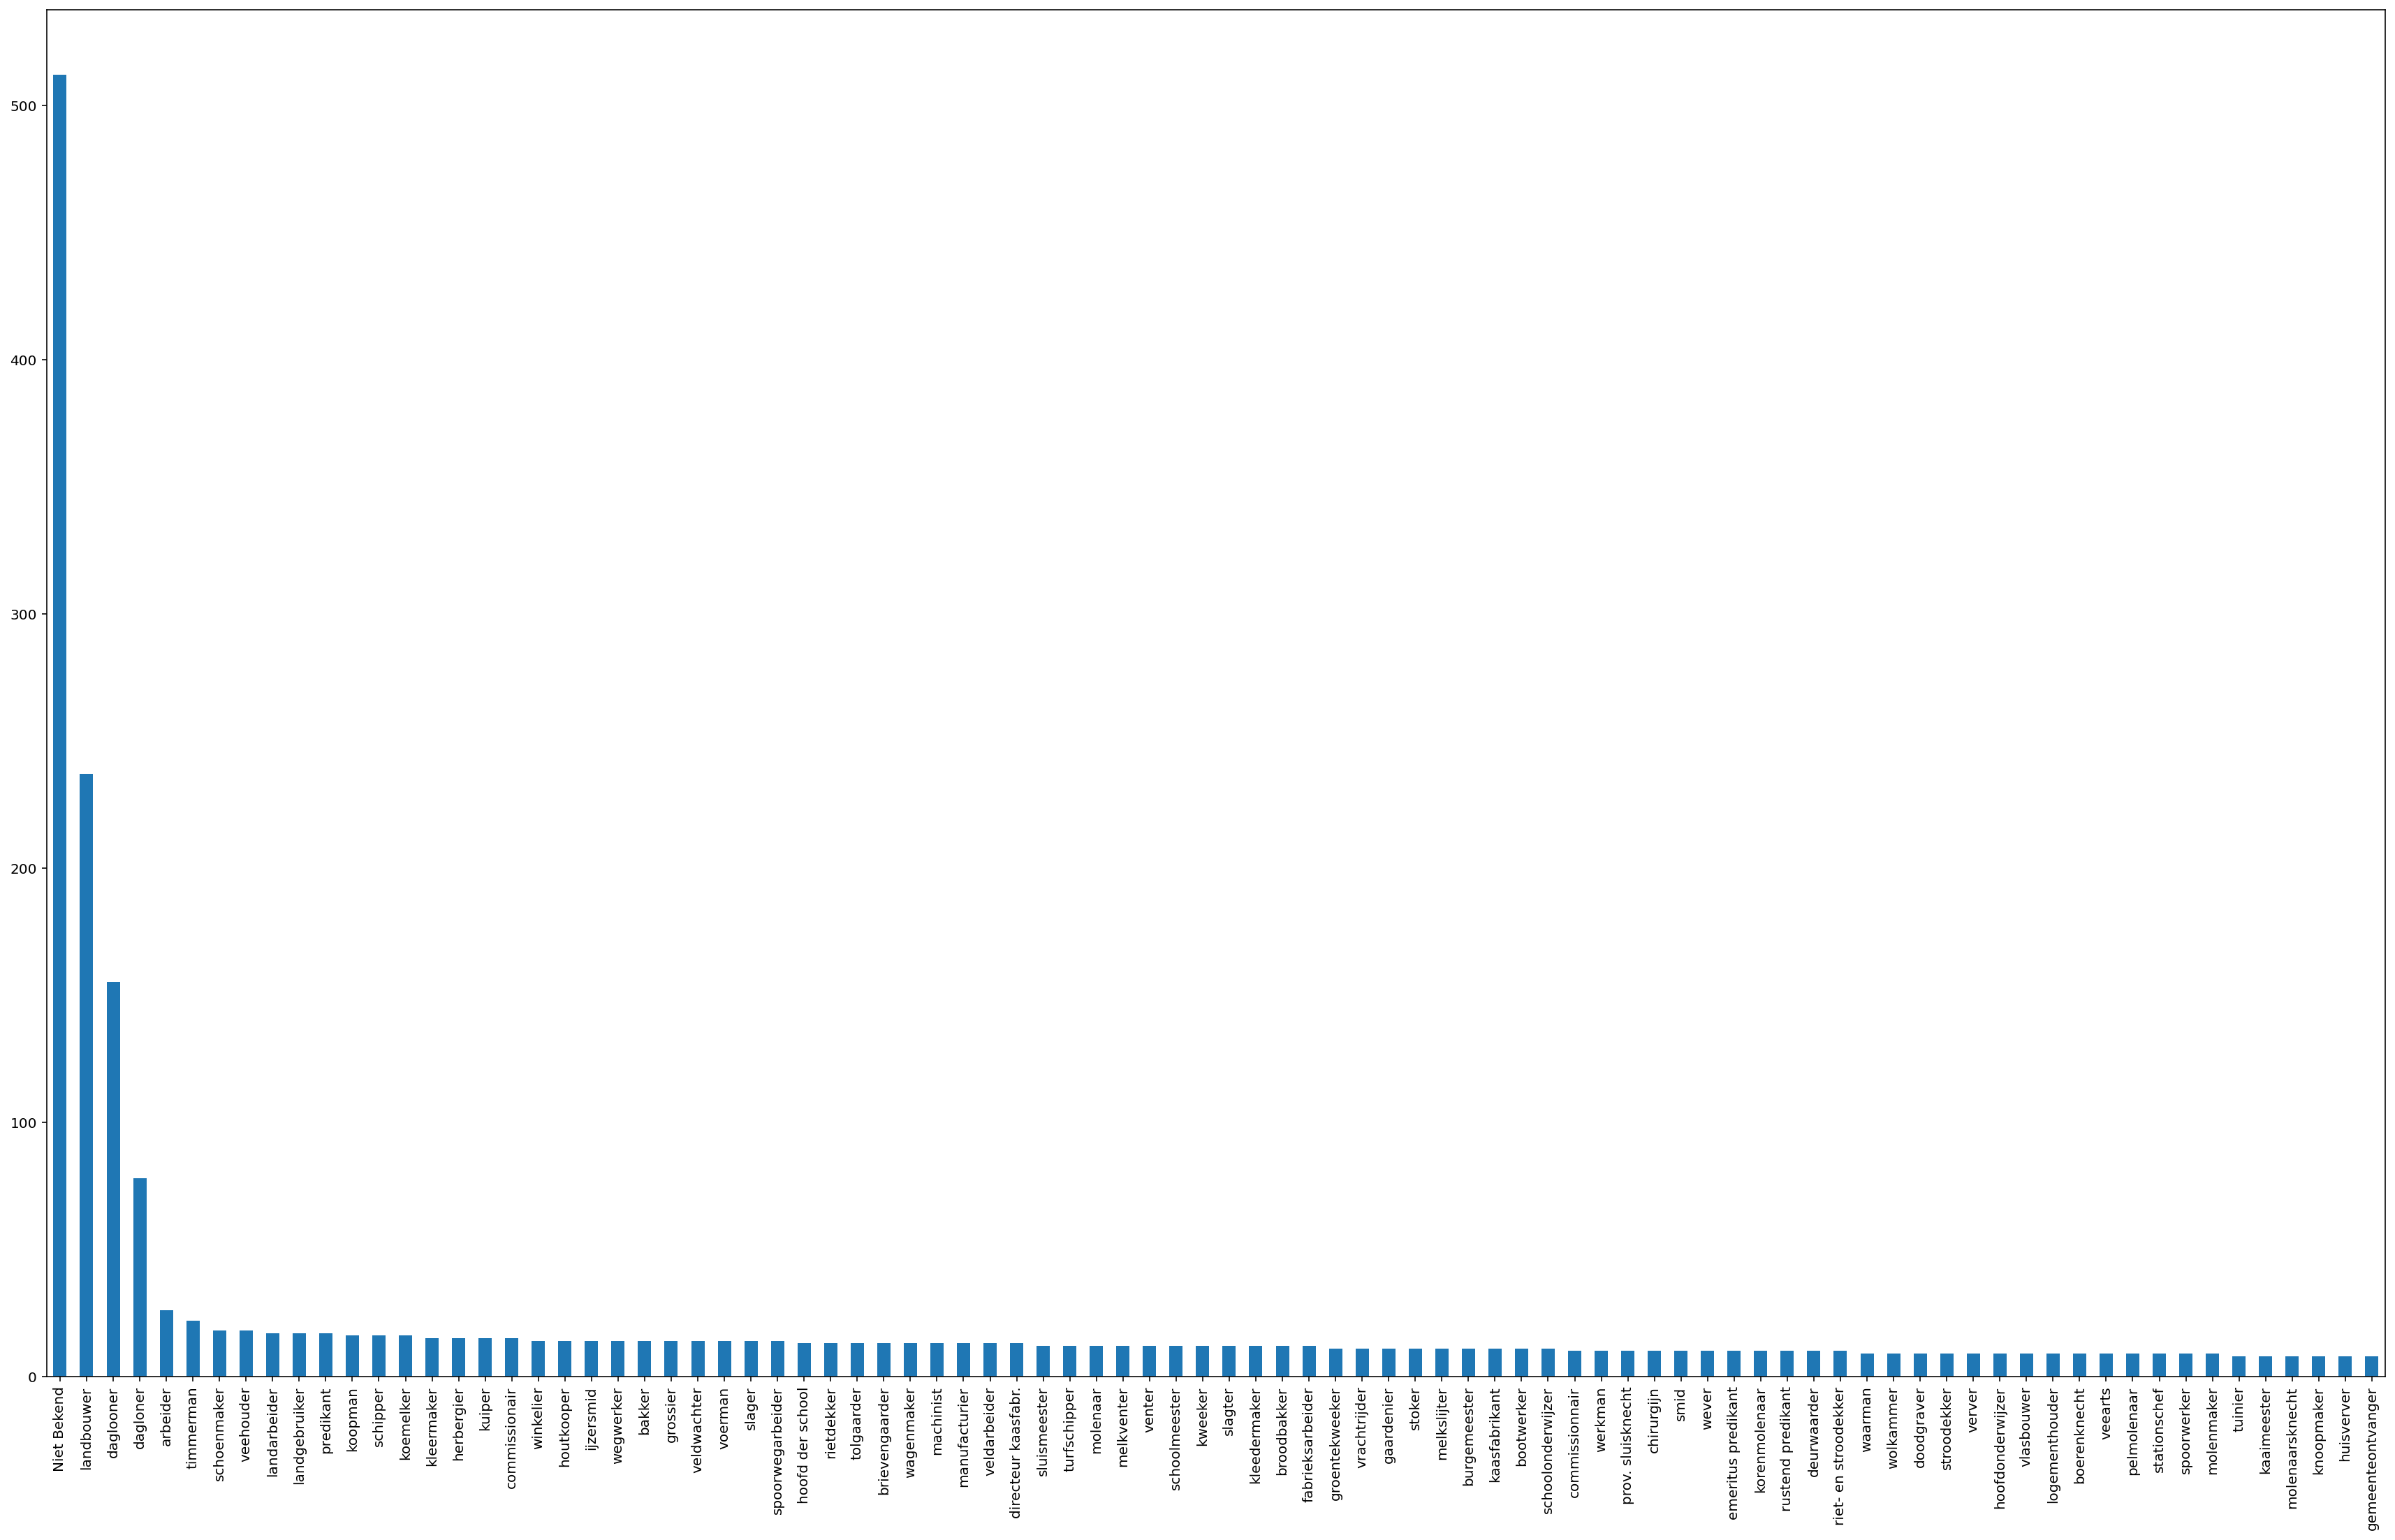

In [22]:
df1['JAARAKTE'].value_counts().plot.bar()
df1['BERVABD'].value_counts().plot.bar()

df1['JAARAKTE'].value_counts().plot.bar()
df1['BERVABD'].value_counts().plot.bar()


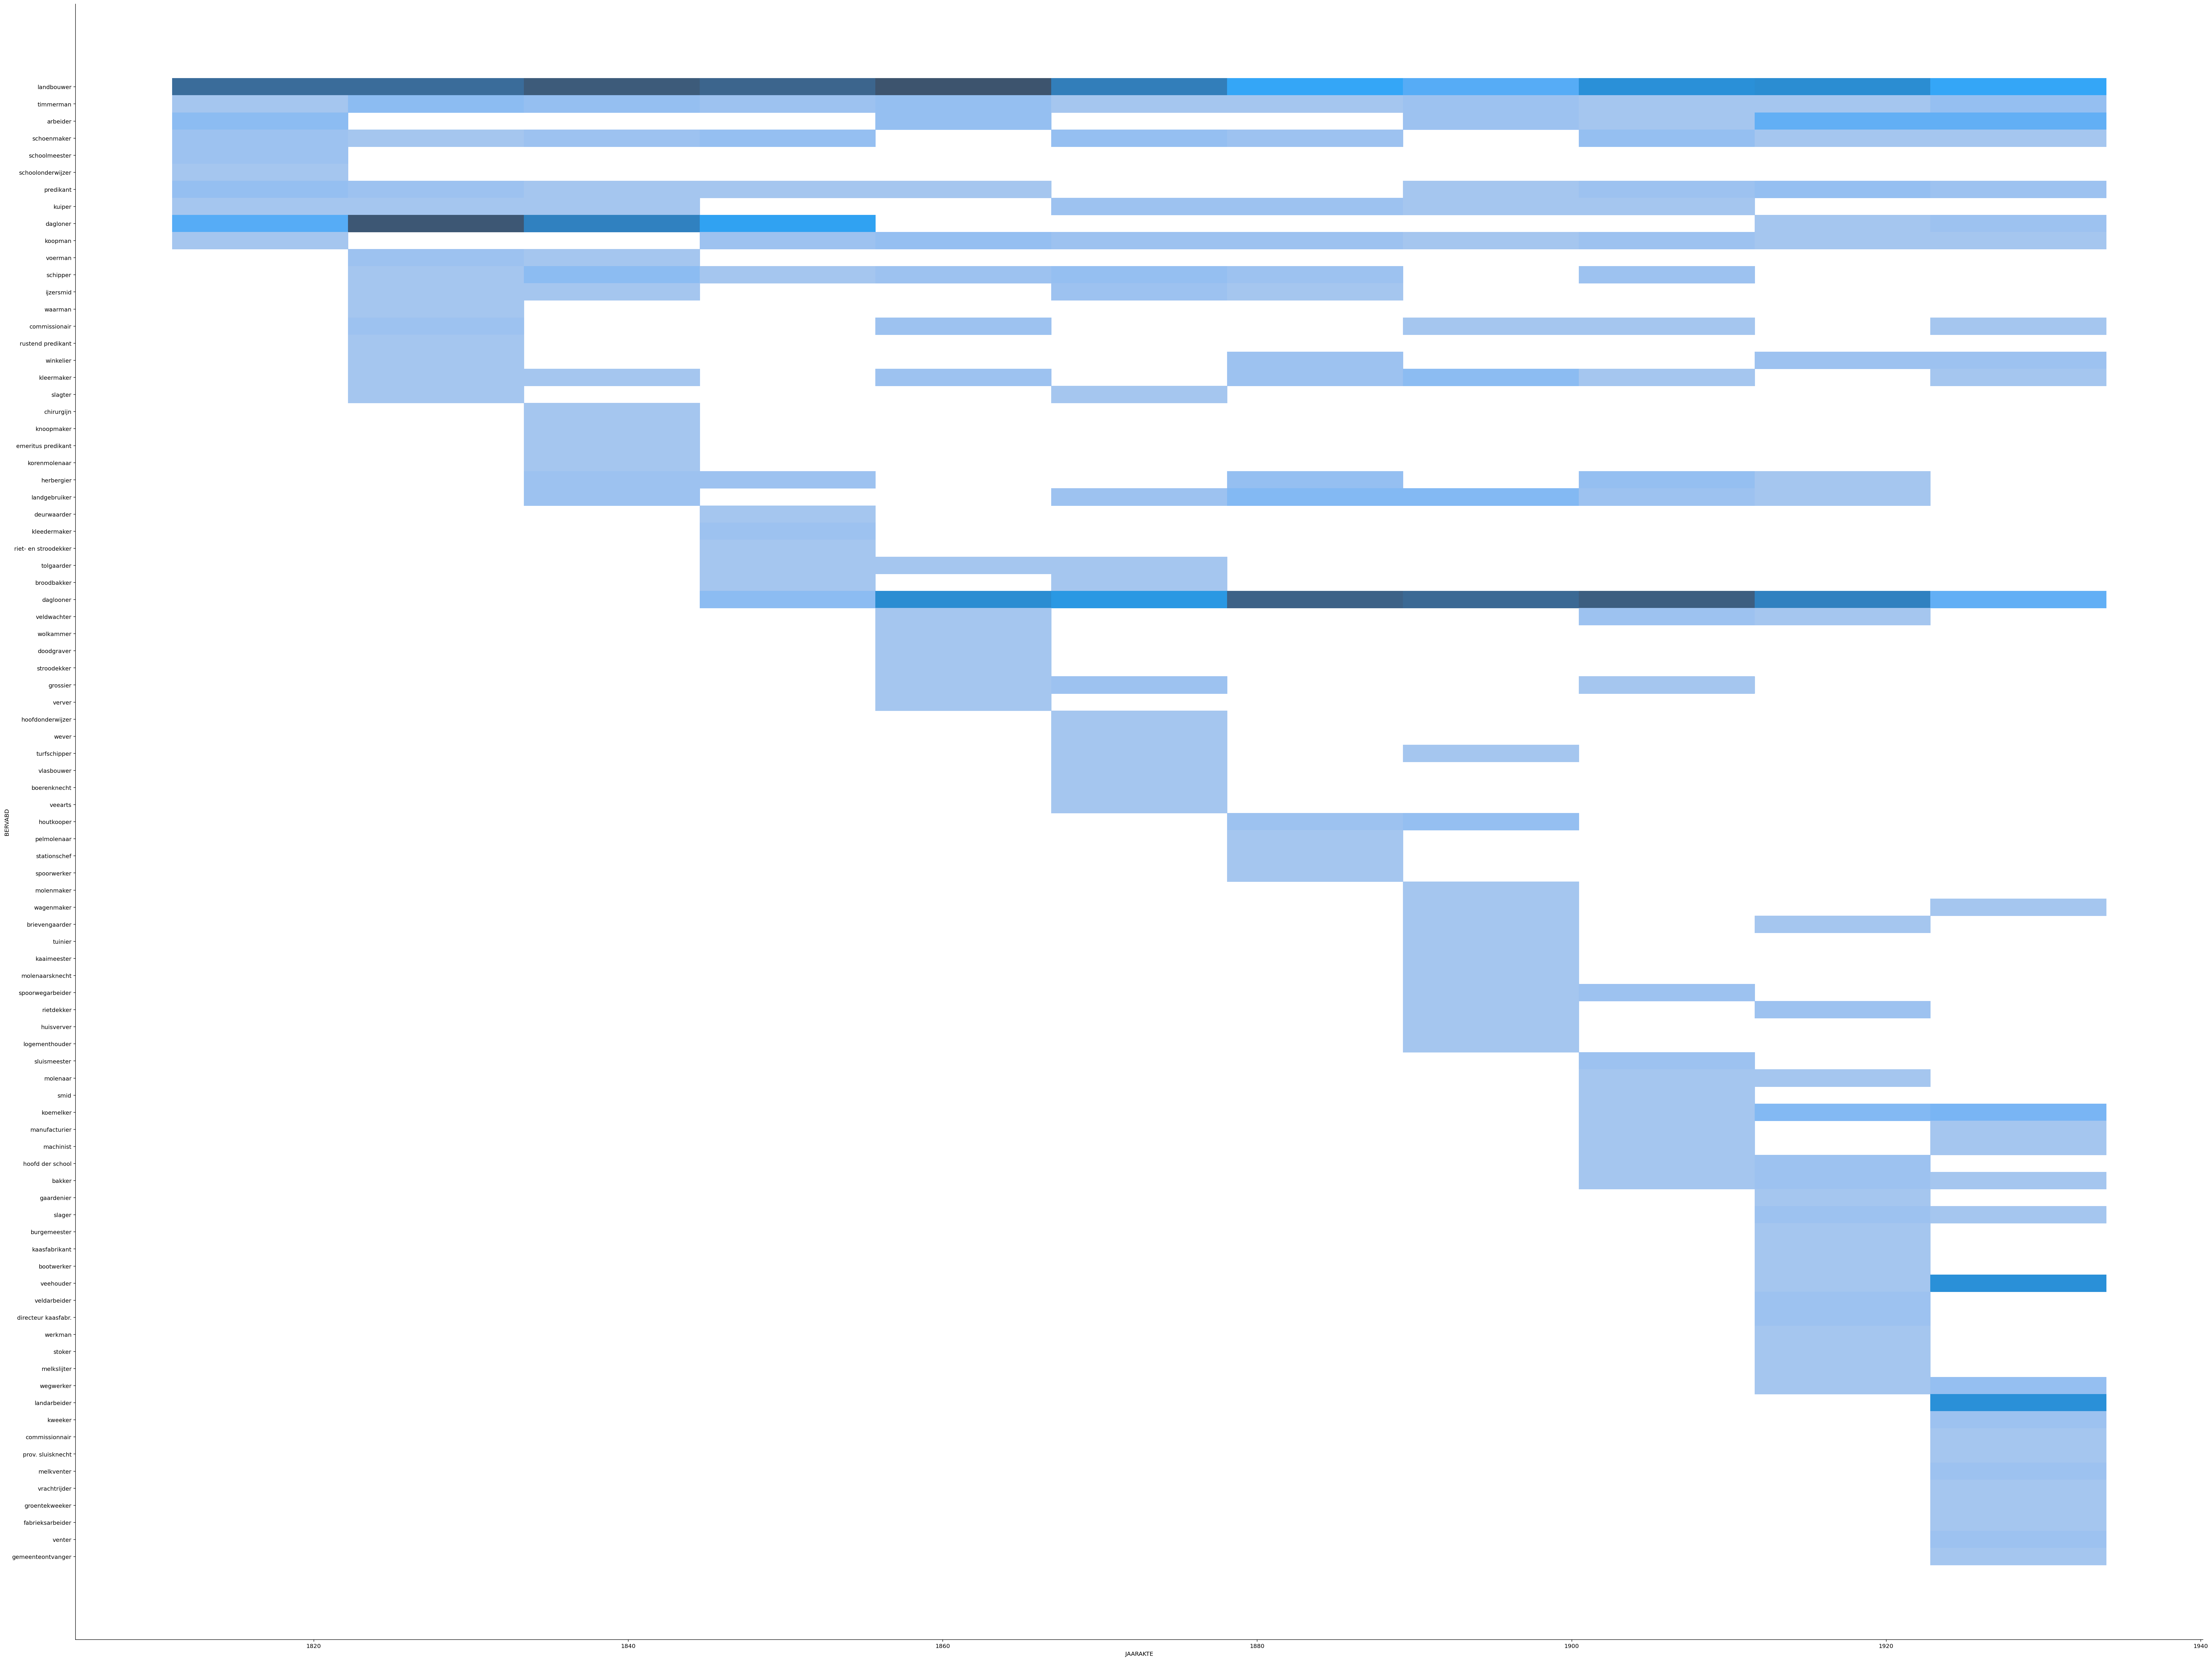

In [23]:
sns.displot(df,x='JAARAKTE', y='BERVABD', height=40, aspect=1.33)